In [1]:
# when independent variables are continuous we have to use linear regression instead of ANOVA

In [1]:
import pandas as pd
TRD_Index=pd.read_table('TRD_Index.txt',sep='\t')
SHindex=TRD_Index[TRD_Index.Indexcd==1]
SZindex=TRD_Index[TRD_Index.Indexcd==399106]
SHRet=SHindex.Retindex
SZRet=SZindex.Retindex
SZRet.index=SHRet.index

In [2]:
import statsmodels.api as sm
model=sm.OLS(SHRet,sm.add_constant(SZRet)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Retindex   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5698.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:43:45   Log-Likelihood:                 4520.3
No. Observations:                1211   AIC:                            -9037.
Df Residuals:                    1209   BIC:                            -9026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.747      0.0

In [3]:
model.fittedvalues[:5]#make forecasting

0    0.024213
1    0.019940
2   -0.002401
3   -0.015390
4    0.016635
dtype: float64

Text(0,0.5,'residue')

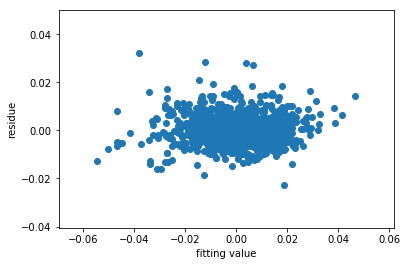

In [4]:
# regression diagonal
# linear
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('fitting value')
plt.ylabel('residue')

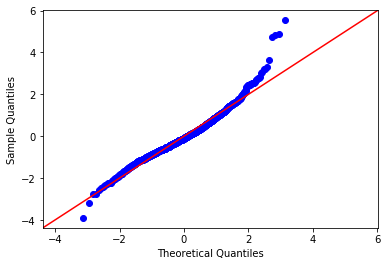

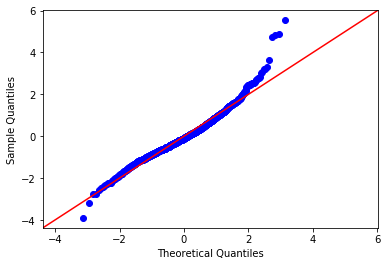

In [5]:
#normal distribution
import scipy.stats as stats 
sm.qqplot(model.resid_pearson,\
         stats.norm,line='45')

/Users/IvanYe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


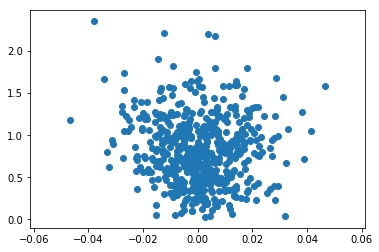

In [6]:
# homo variations
plt.scatter(model.fittedvalues,\
           model.resid_pearson**0.5)

In [7]:
# multi regression
import numpy as np
penn=pd.read_excel('Penn World Table.xlsx',2)
# first we put a fixed model, which means we do not much filtrations about variables
model=sm.OLS(np.log(penn.rgdpe),\
            sm.add_constant(penn.iloc[:,-6:])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     56.69
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           9.81e-59
Time:                        12:44:00   Log-Likelihood:                -1670.2
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     828   BIC:                             3388.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4226      0.518     16.254      0.0

In [8]:
#we notice that there may be some relationships among those variables
penn.iloc[:,-6:].corr()

,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
pl_c,1.000000,0.718931,0.636698,0.078841,0.213328,0.553757
pl_i,0.718931,1.000000,0.259183,0.072019,0.139333,0.779306
pl_g,0.636698,0.259183,1.000000,0.130729,0.256069,0.211259
pl_x,0.078841,0.072019,0.130729,1.000000,0.477304,-0.065623
pl_m,0.213328,0.139333,0.256069,0.477304,1.000000,0.000531
pl_k,0.553757,0.779306,0.211259,-0.065623,0.000531,1.000000


In [9]:
#put plc and plk aside
model=sm.OLS(np.log(penn.rgdpe),\
            sm.add_constant(penn.iloc[:,-5:-1])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.00
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           6.58e-60
Time:                        12:44:09   Log-Likelihood:                -1672.0
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     830   BIC:                             3378.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3558      0.502     16.631      0.0